## 正则化线性回归

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
from scipy.io import loadmat
import scipy.optimize as opt

In [21]:
# load data
X=loadmat('ex5data1.mat')['X'] 
y=loadmat('ex5data1.mat')['y'].ravel() #展开成一维，下同
Xval = loadmat('ex5data1.mat')['Xval']
yval = loadmat('ex5data1.mat')['yval'].ravel()
Xtest = loadmat('ex5data1.mat')['Xtest']
ytest = loadmat('ex5data1.mat')['ytest'].ravel()

[Text(0.5, 0, 'X'), Text(0, 0.5, 'y')]

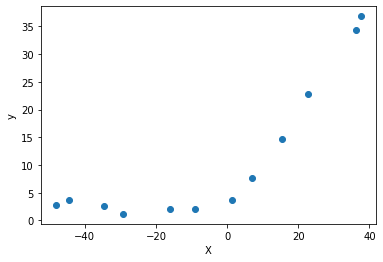

In [3]:
#可视化
fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set(xlabel='X',ylabel='y')

In [4]:
def insertOnes(x):
    return np.insert(x,0,np.ones(x.shape[0]),axis=1) # 给X插入1

In [22]:
X=insertOnes(X)
Xval = insertOnes(Xval)
Xval 

array([[  1.        , -16.74653578],
       [  1.        , -14.57747075],
       [  1.        ,  34.51575866],
       [  1.        , -47.01007574],
       [  1.        ,  36.97511905],
       [  1.        , -40.68611002],
       [  1.        ,  -4.47201098],
       [  1.        ,  26.53363489],
       [  1.        , -42.7976831 ],
       [  1.        ,  25.37409938],
       [  1.        , -31.10955398],
       [  1.        ,  27.31176864],
       [  1.        ,  -3.26386201],
       [  1.        ,  -1.81827649],
       [  1.        , -40.7196624 ],
       [  1.        , -50.01324365],
       [  1.        , -17.41177155],
       [  1.        ,   3.5881937 ],
       [  1.        ,   7.08548026],
       [  1.        ,  46.28236902],
       [  1.        ,  14.61228909]])

In [6]:
theta = np.zeros(X.shape[1])
theta

array([0., 0.])

In [7]:
#正则化损失函数
def cost(theta,X,y):
    m = X.shape[0] # 样本数目
    error = np.sum(np.square(X.dot(theta.T) - y))
    return error / (2*m)

In [8]:
def r_cost(theta,X,y,l=1):
    m = X.shape[0]
    r = (np.sum(np.square(theta[1:]))) * (l/(2*m))
    return cost(theta,X,y) + r

In [9]:
theta = np.ones(X.shape[1]) # 将theta 的初始值变为1
r_cost(theta,X,y)

303.9931922202643

In [10]:
theta

array([1., 1.])

## 梯度下降 regularized linear regression gradient 

In [11]:
def gradient(theta,X,y,l=1):
    m = X.shape[0] # 样本个数
    temptheta = theta.copy()
    temptheta[0] = 0 # 将bias的系数变为0，这样后面算梯度就影响不到bias项了
    r = temptheta * (l/m) # 正则化项
    error = X.dot(theta.T) -y 
    gradTheta = X.T.dot(error) / m  + r 
    return gradTheta  

In [12]:
gradient(theta,X,y)

array([-15.30301567, 598.25074417])

## 拟合线性回归


In [13]:
def linear_regression_np(X, y, l=1):
    """linear regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        l: lambda constant for regularization

    return: trained parameters
    """
    # init theta
    theta = np.ones(X.shape[1])

    # train it
    res = opt.minimize(fun=r_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=gradient,
                       options={'disp': True})
    return res


In [14]:
linear_regression_np(X,y)

     fun: 22.379541822940265
     jac: array([1.25341733e-08, 8.56473651e-08])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 7
     nit: 3
  status: 0
 success: True
       x: array([13.08771417,  0.367742  ])

In [15]:
theta = linear_regression_np(X,y,l=0).x
theta

array([13.08790348,  0.36777923])

[Text(0.5, 0, 'X'), Text(0, 0.5, 'y')]

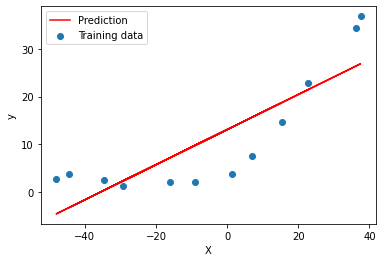

In [16]:
#可视化
fig,ax = plt.subplots()
ax.scatter(X[:,1:],y,label='Training data') #X 加上了1，改变了维度
ax.plot(X[:,1:],X.dot(theta.T),color='r',label="Prediction") # X.dot(theta.T) 很优雅
ax.legend()
ax.set(xlabel='X',ylabel='y')

## bias-variance

# learning curve #学习曲线

In [45]:
def get_Jcost(Xtrain,ytrain,Xval,yval,l=0):
    #theta = np.ones(Xtrain.shape[1]) #init theta
    Jtrain = [] # 训练集的error
    Jval = [] #验证集的error
    for i in range(1,Xtrain.shape[0] + 1):
        theta = linear_regression_np(Xtrain[:i],ytrain[:i],l=l).x #每增加一个数据集就重新拟合theta
        Jtrain.append(cost(theta,Xtrain[:i],ytrain[:i])) # 计算error
        Jval.append(cost(theta,Xval,yval)) #用训练集拟合的theta去计算测试集的error
    return Jtrain,Jval

In [42]:
Jtrain,Jval = get_Jcost(X,y,Xval,yval)

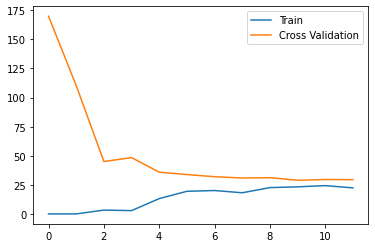

In [43]:
fig,ax=plt.subplots()
ax.plot(range(len(Jtrain)),Jtrain,label='Train')
ax.plot(range(len(Jval)),Jval,label='Cross Validation')
ax.legend()

# Polynomial regression

In [25]:
def poly_features(x,n):
    tmp =[np.ones(x.shape[0])]
    for i in range(1,n+1):
        tmp.append(np.power(x[:,1],i))
    return pd.DataFrame(tmp).values.T

In [26]:
Xval_poly = pd.DataFrame(poly_features(Xval,8))

In [27]:
tmp=poly_features(X,8)
pd.DataFrame(tmp)

,0,1,2,3,4,5,6,7,8
0,1.0,-15.936758,253.980260,-4047.621971,6.450597e+04,-1.028016e+06,1.638324e+07,-2.610958e+08,4.161020e+09
1,1.0,-29.152979,849.896197,-24777.006175,7.223235e+05,-2.105788e+07,6.139000e+08,-1.789701e+10,5.217513e+11
2,1.0,36.189549,1309.683430,47396.852168,1.715271e+06,6.207487e+07,2.246462e+09,8.129843e+10,2.942154e+12
3,1.0,37.492187,1405.664111,52701.422173,1.975892e+06,7.408050e+07,2.777440e+09,1.041323e+11,3.904148e+12
4,1.0,-48.058829,2309.651088,-110999.127750,5.334488e+06,-2.563693e+08,1.232081e+10,-5.921235e+11,2.845676e+13
5,1.0,-8.941458,79.949670,-714.866612,6.391950e+03,-5.715335e+04,5.110343e+05,-4.569391e+06,4.085702e+07
6,1.0,15.307793,234.328523,3587.052500,5.490986e+04,8.405487e+05,1.286695e+07,1.969645e+08,3.015092e+09
7,1.0,-34.706266,1204.524887,-41804.560890,1.450880e+06,-5.035463e+07,1.747621e+09,-6.065341e+10,2.105053e+12
8,1.0,1.389154,1.929750,2.680720,3.723935e+00,5.173120e+00,7.186262e+00,9.982827e+00,1.386769e+01
9,1.0,-44.383760,1969.918139,-87432.373590,3.880577e+06,-1.722346e+08,7.644420e+09,-3.392881e+11,1.505888e+13


In [28]:
X_poly = poly_features(X,8)

# normalization  标准化

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
def normalize_feature(x):
    scaler = StandardScaler() #实例化
    scaler.fit(x)
    #scaler.mean_
    tmp = scaler.transform(x)
    tmp[:,0] = 1
    return tmp 
    

In [31]:
X_poly_scaled = normalize_feature(X_poly)
Xval_ploy = poly_features(Xval,8)
Xval_poly_scaled = normalize_feature(Xval_ploy)
pd.DataFrame(Xval_poly_scaled)

,0,1,2,3,4,5,6,7,8
0,1.0,-0.424161,-0.753116,0.127536,-0.736940,0.245527,-0.634134,0.266987,-0.553105
1,1.0,-0.350790,-0.836831,0.158743,-0.754889,0.251765,-0.637030,0.267970,-0.553515
2,1.0,1.309835,0.369222,1.021857,-0.018489,0.721820,-0.246305,0.518457,-0.354379
3,1.0,-1.447853,1.624282,-1.808682,1.838194,-1.915802,1.869067,-1.903938,1.806646
4,1.0,1.393025,0.585857,1.205946,0.222582,0.912351,-0.045384,0.673137,-0.207994
5,1.0,-1.233939,0.940957,-1.095441,0.689403,-0.797593,0.414921,-0.521651,0.189337
6,1.0,-0.008963,-1.074021,0.217464,-0.778875,0.257980,-0.639258,0.268569,-0.553717
7,1.0,1.039832,-0.231201,0.583848,-0.513461,0.382520,-0.558161,0.308215,-0.529405
8,1.0,-1.305365,1.158160,-1.310936,1.018821,-1.101461,0.788844,-0.857503,0.560099
9,1.0,1.000609,-0.305361,0.538102,-0.556937,0.357588,-0.577233,0.297566,-0.536712


In [32]:
tmp = linear_regression_np(X_poly_scaled,y).x
tmp

array([11.21759115,  8.36723487,  5.10200369,  3.3901556 ,  2.15881336,
        1.62043582,  0.97248416,  1.02573945,  0.32265136])

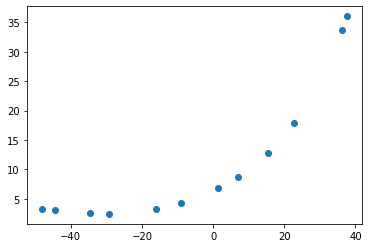

In [33]:
plt.scatter(X[:,1],X_poly_scaled.dot(tmp.T))

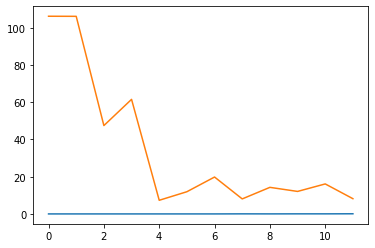

In [46]:
Jtrain,Jcost = get_Jcost(X_poly_scaled,y,Xval_poly_scaled,yval,l=0)# lambda =0 
fig,ax=plt.subplots()
ax.plot(range(len(Jtrain)),Jtrain)
ax.plot(range(len(Jcost)),Jcost)

In [35]:
def plot_learning_curve(X, y, Xval, yval, l=0): #别人的方法
    training_cost, cv_cost = [], []
    m = X.shape[0]

    for i in range(1, m + 1):
        # regularization applies here for fitting parameters
        res = linear_regression_np(X[:i, :], y[:i], l=l)

        # remember, when you compute the cost here, you are computing
        # non-regularized cost. Regularization is used to fit parameters only
        tc = cost(res.x, X[:i, :], y[:i])
        cv = cost(res.x, Xval, yval)

        training_cost.append(tc)
        cv_cost.append(cv)

    plt.plot(np.arange(1, m + 1), training_cost, label='training cost')
    plt.plot(np.arange(1, m + 1), cv_cost, label='cv cost')
    plt.legend(loc=1)


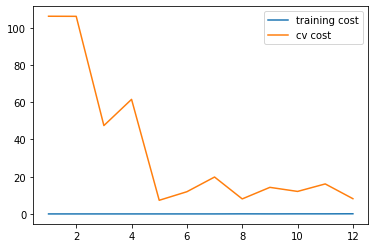

In [37]:
plot_learning_curve(X_poly_scaled,y,Xval_poly_scaled,yval)

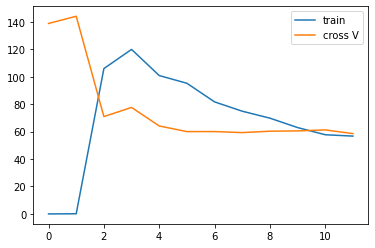

In [55]:
Jtrain,Jcost = get_Jcost(X_poly_scaled,y,Xval_poly_scaled,yval,l=100) # lambda =100
fig,ax=plt.subplots()
ax.plot(range(len(Jtrain)),Jtrain,label='train')
ax.plot(range(len(Jcost)),Jcost,label='cross V')
ax.legend()

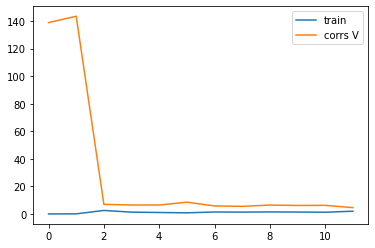

In [51]:
Jtrain,Jcost = get_Jcost(X_poly_scaled,y,Xval_poly_scaled,yval,l=1)# lambda =1
fig,ax=plt.subplots()
ax.plot(range(len(Jtrain)),Jtrain,label='train')
ax.plot(range(len(Jcost)),Jcost,label='corrs V')
ax.legend()

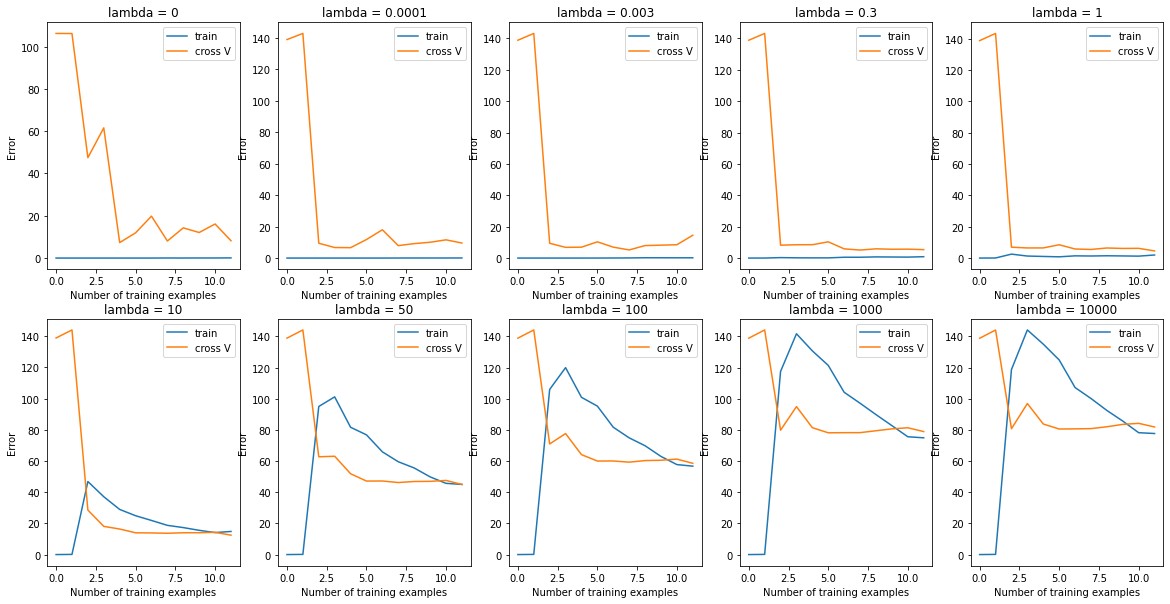

In [71]:
lambdaList = [[0,0.0001,0.003,0.3,1],[10,50,100,1000,10000]] #设计成2*5，只是为了下面画图时取数方便 #也可以使用np.reshape 
fig,axs = plt.subplots(2,5,figsize=(20,10))
for i in range(len(lambdaList)):
    for j in range(len(lambdaList[0])):
        l = lambdaList[i][j]
        Jtrain,Jcost = get_Jcost(X_poly_scaled,y,Xval_poly_scaled,yval,l=l)
        axs[i,j].plot(range(len(Jtrain)),Jtrain,label='train')
        axs[i,j].plot(range(len(Jcost)),Jcost,label='cross V')
        axs[i,j].set_title("lambda = %s" %lambdaList[i][j])
        axs[i,j].set_xlabel('Number of training examples')
        axs[i,j].set_ylabel('Error')
        axs[i,j].legend()

#  可以看到当lambda取 1 时 both train and 验证集的error都很小